In [1]:
import numpy as np
import pandas as pd
pd.set_option('html', True)

In [12]:
url = "C:\Users\Anshul\Desktop\8 August_experiment.csv"
TestNetworkData = pd.read_csv(url)
TestNetworkData.head()

,Expr1000,"""No Of requests per Day"""
0,Weekdays,5896
1,Weekends,3661
2,NaN,NaN
3,Weekdays,5896
4,Weekends,3661


In [13]:
%matplotlib inline
from itertools import cycle, islice

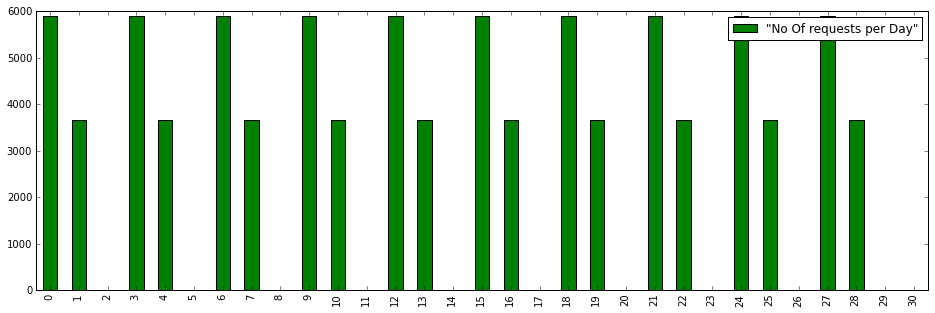

In [14]:
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(TestNetworkData)))
myDestGroupPlotSortedBySize = TestNetworkData.plot(kind='bar',stacked=True, color=['g','b','b','b','b'], figsize=(16,5))

In [8]:
################################################################################
# Script to find the following: 
# 1. Department which gets maximum number of compliants 
# 2. Compliant Type which is more dominant
################################################################################

departmentDict = {}
compliantTypeDict = {}

fp = open("C:/Users/Anshul/Desktop/311_2015_Full.csv","r")
for line in fp:
    department = line.split(",")[3].strip()
    compliantType = line.split(",")[5].strip()

    if department in departmentDict: 
        departmentDict[department] = departmentDict.get(department) + 1 
    else: 
        departmentDict[department] = 1 

    if compliantType in compliantTypeDict: 
        compliantTypeDict[compliantType] = compliantTypeDict.get(compliantType) + 1
    else: 
        compliantTypeDict[compliantType] = 1


        
fp.close()

fdept = open("C:/Users/Anshul/Desktop/DepartmentWithMostCompliants.txt","w")
for k, v in departmentDict.items():
    fdept.write(str(k)+":"+str(v)+"\n")

fdept.close()

fComp= open("C:/Users/Anshul/Desktop/MostCompliantTypes.txt","w")
for k, v in compliantTypeDict.items():
    fComp.write(str(k)+":"+str(v)+"\n")
fComp.close()

In [6]:
import operator
x = departmentDict
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
sorted_x.reverse()

In [7]:
sorted_x

[('Department of Housing Preservation and Development', 450372),
 ('New York City Police Department', 269717),
 ('Department of Transportation', 255325),
 ('Department of Environmental Protection', 142779),
 ('Department of Buildings', 60928),
 ('Department of Parks and Recreation', 58166),
 ('Department of Health and Mental Hygiene', 45100),
 ('Department of Finance', 23297),
 ('Taxi and Limousine Commission', 18566),
 ('HRA Benefit Card Replacement', 17029),
 ('Department of Consumer Affairs', 15723),
 ('BCC - Brooklyn South', 11637),
 ('NYC Emergency Management', 133),
 ('Division of Alternative Management', 121),
 ('Central - Department of Education', 89),
 ('OATH', 86),
 ('DOB Inspections - Brooklyn', 84),
 ('DOB Inspections - Bronx', 53),
 ('Bureau of Fire Prevention - Public Assembly Unit - Inspections', 51),
 ('P - Commercial Recycling Citywide', 49),
 ('DOB Inspections - Manhattan', 41),
 ('DHS Commissioner - EC', 39),
 ('DOP', 31),
 ('School - Achievement First Crown Heights 

In [20]:
import datetime as dt

resolutionDict = {}
resolutionDictCount = {}

fp = open("C:/Users/Anshul/Desktop/9September.csv","r")
for line in fp:
	createdDate = line.split(",")[1].strip()
	closedDate = line.split(",")[2].strip()
	agency = line.split(",")[3].strip()

	if createdDate is None or closedDate is None or createdDate =="" or closedDate =="" or createdDate == "Created Date":
		continue

	c1Date = createdDate.split(" ")[0]
	c1Month = c1Date.split("/")[0]
	c1Day = c1Date.split("/")[1]
	c1Year = c1Date.split("/")[2]
	
	c1Time = createdDate.split(" ")[1]
	c1Hour = c1Time.split(":")[0]
	c1Min = c1Time.split(":")[1]

	c2Date = closedDate.split(" ")[0]
	c2Month = c2Date.split("/")[0]
	c2Day = c2Date.split("/")[1]
	c2Year = c2Date.split("/")[2]
	
	c2Time = closedDate.split(" ")[1]
	c2Hour = c2Time.split(":")[0]
	c2Min = c2Time.split(":")[1]

	startTime = dt.datetime(int(c1Year),int(c1Month),int(c1Day),int(c1Hour),int(c1Min),0)
	endTime = dt.datetime(int(c2Year),int(c2Month),int(c2Day),int(c2Hour),int(c2Min),0)

	# Get values in minutes
	diff = int((endTime - startTime).total_seconds() / 60)
	if agency in resolutionDict:
		resolutionDict[agency] = resolutionDict.get(agency) + diff
		resolutionDictCount[agency] = resolutionDictCount.get(agency) + 1
	else : 
		resolutionDict[agency] = diff
		resolutionDictCount[agency] = 1
		
fp.close()

for (k, v),(k2,v2) in zip(resolutionDict.items(), resolutionDictCount.items()):
	print k,int(v)/int(v2)



EDC 23289
DFTA 12612
DSNY 2583
DPR 7141
DOHMH -3623
DEP 3021
DHS 0
DOF 2669
DOITT 15316
DCA 10725
TLC 3512
DOB 2929
DOE 15895
NYCEM 6511
3/1/2001 5
FDNY 17143
NYPD 268
HRA 0
DOT 2816
HPD 12048


In [21]:

fp = open("C:\Users\Anshul\Desktop\9September.csv","r")
fout = open("C:\Users\Anshul\Desktop\LatLongPoints.txt","w")
for line in fp:
	lat = line.split(",")[50].strip()
	longit= line.split(",")[51].strip()
	if lat is None or longit is None or lat == "" or longit == "" or lat == " " or longit == " ": 
		continue
	fout.write(lat+" "+longit+"\n")
	

fp.close()
fout.close()
